# Validation, Regularisation and Callbacks

## Coding tutorials
#### [1. Validation sets](#coding_tutorial_1)
#### [2. Model regularisation](#coding_tutorial_2)
#### [3. Introduction to callbacks](#coding_tutorial_3)
#### [4. Early stopping / patience](#coding_tutorial_4)

In [1]:
#### Package imports ####

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
print(tf.__version__)
        
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback, EarlyStopping

2.2.0


***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset
diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])
print("\n", diabetes_dataset.keys())

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

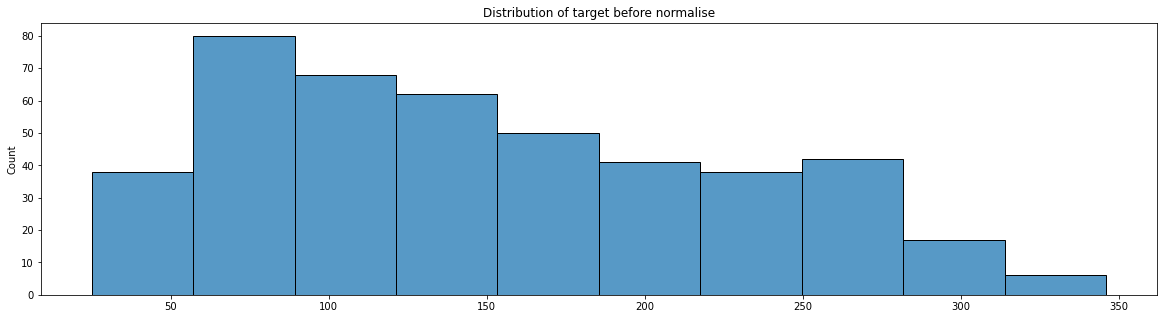

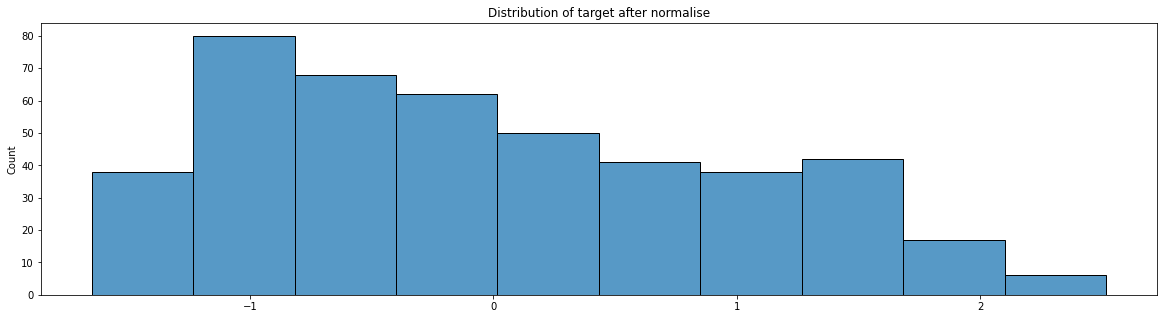

In [3]:
# Save the input and target variables
data = diabetes_dataset["data"]
target = diabetes_dataset["target"]

fig, ax = plt.subplots(figsize=(20,5))
sns.histplot(ax=ax, data=target)
plt.title("Distribution of target before normalise")
plt.show()

# Normalise the target data will make clearer training curves
target = (target - target.mean()) / target.std()

fig, ax = plt.subplots(figsize=(20,5))
sns.histplot(ax=ax, data=target)
plt.title("Distribution of target after normalise")
plt.show()

In [4]:
# Split the data into train and test sets
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [5]:
# Build the model
def get_model():
    model = Sequential([
        Dense(128, activation='relu', 
            input_shape=(train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)])
    return model

model = get_model()

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

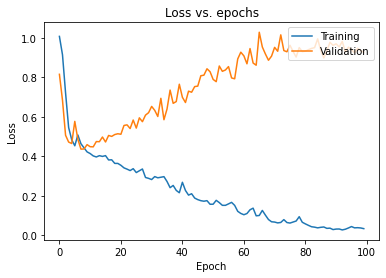

2/2 - 0s - loss: 1.0250 - mae: 0.7913


[1.0249955654144287, 0.7912780046463013]

In [6]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae'])

# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_target, epochs=100,
    validation_split=0.15, batch_size=64, verbose=False)
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss vs. epochs")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc="upper right")
plt.show()

# Evaluate the model on the test set
model.evaluate(test_data, test_target, verbose=2)

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [7]:
# Build the model
def get_regularised_model(l1, l2, rate):
    model = Sequential([
        Dense(128, activation='relu', 
            kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2),
            bias_regularizer=regularizers.l2(l2),
            input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, activation='relu', 
            kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2),
            bias_regularizer=regularizers.l2(l2)),
        Dropout(rate),
        Dense(128, activation='relu', 
            kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2),
            bias_regularizer=regularizers.l2(l2)),
        Dropout(rate),
        Dense(128, activation='relu', 
            kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2),
            bias_regularizer=regularizers.l2(l2)),
        Dropout(rate),
        Dense(128, activation='relu', 
            kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2),
            bias_regularizer=regularizers.l2(l2)),
        Dropout(rate),
        Dense(128, activation='relu', 
            kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2),
            bias_regularizer=regularizers.l2(l2)),
        Dropout(rate),
        Dense(1)])
    return model

# Re-build the model with weight decay and dropout layers
model = get_regularised_model(l1=3e-4, l2=1e-5, rate=0.3)

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               1408      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

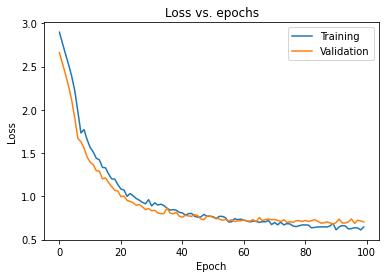

2/2 - 0s - loss: 0.9109 - mae: 0.6982


[0.9108873009681702, 0.698218584060669]

In [8]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae'])

# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_target, epochs=100,
    validation_split=0.15, batch_size=64, verbose=False)
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss vs. epochs")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc="upper right")
plt.show()

# Evaluate the model on the test set
model.evaluate(test_data, test_target, verbose=2)

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [9]:
# Write a custom callback
class TrainingCallback(Callback):
    
    def on_train_begin(self, logs=None):
        print("Starting training....")
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting epoch {epoch}")
        
    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training: Starting batch {batch}")
        
    def on_train_batch_end(self, batch, logs=None):
        print(f"Training: Finished batch {batch}")
        
    def on_epoch_end(self, epoch, logs=None):
        print(f"Finished epoch {epoch}")
        
    def on_train_end(self, logs=None):
        print("Finished training!")
        
# Re-build the model
model = get_regularised_model(l1=3e-4, l2=1e-5, rate=0.3)

In [10]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae'])

# Train the model with the callback
model.fit(train_data, train_target, epochs=3, batch_size=128,
    verbose=False, callbacks=[TrainingCallback()])

Starting training....
Starting epoch 0
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 0
Starting epoch 1
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 1
Starting epoch 2
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 2
Finished training!


In [11]:
# Write a custom callback
class TestingCallback(Callback):
    
    def on_test_begin(self, logs=None):
        print("Starting testing....")
        
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing: Starting batch {batch}")
        
    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing: Finished batch {batch}")
        
    def on_test_end(self, logs=None):
        print("Finished testing!")
        
# Evaluate the model
model.evaluate(test_data, test_target, verbose=False,
    callbacks=[TestingCallback()])

Starting testing....
Testing: Starting batch 0
Testing: Finished batch 0
Testing: Starting batch 1
Testing: Finished batch 1
Finished testing!


[2.665175676345825, 0.8653672933578491]

In [12]:
# Write a custom callback
class PredictionCallback(Callback):
    
    def on_predict_begin(self, logs=None):
        print("Starting prediction...")
        
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Prediction: Starting batch {batch}")
        
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Prediction: Finished batch {batch}")
        
    def on_predict_end(self, logs=None):
        print("Finished prediction!")
        
# Make predictions with the model
model.predict(test_data, verbose=False, 
    callbacks=[PredictionCallback()])

Starting prediction...
Prediction: Starting batch 0
Prediction: Finished batch 0
Prediction: Starting batch 1
Prediction: Finished batch 1
Finished prediction!


array([[0.01802585],
       [0.0091356 ],
       [0.01931602],
       [0.00561322],
       [0.0077457 ],
       [0.02456553],
       [0.01976101],
       [0.01792876],
       [0.00701199],
       [0.00323572],
       [0.02286191],
       [0.00831391],
       [0.01921989],
       [0.01897774],
       [0.02377502],
       [0.02678939],
       [0.01177537],
       [0.02066262],
       [0.02205499],
       [0.01669393],
       [0.01271861],
       [0.00213356],
       [0.01539313],
       [0.0025964 ],
       [0.0141237 ],
       [0.01130742],
       [0.00572055],
       [0.00621036],
       [0.01356371],
       [0.01468181],
       [0.01604708],
       [0.02163224],
       [0.02181594],
       [0.0235937 ],
       [0.02131917],
       [0.02007261],
       [0.02292312],
       [0.00282194],
       [0.01163381],
       [0.00610192],
       [0.01353858],
       [0.01587272],
       [0.0214053 ],
       [0.01606082],
       [0.02259788]], dtype=float32)

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [22]:
# Re-train the unregularised model
unregularised_model = get_model()
unregularised_model.compile(optimizer='adam', 
    loss='mse', metrics=['mae'])
unreg_history = unregularised_model.fit(train_data, train_target,
    epochs=100, validation_split=0.15, batch_size=64, verbose=False,
    callbacks=[EarlyStopping(monitor='val_loss', patience=2, 
         min_delta=0.001)])

# Evaluate the model on the test set
unregularised_model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.9536 - mae: 0.8281


[0.953594982624054, 0.8281236290931702]

In [23]:
# Re-train the regularised model
regularised_model = get_regularised_model(l1=3e-4, l2=1e-5, rate=0.3)
regularised_model.compile(optimizer='adam', 
    loss='mse', metrics=['mae'])
reg_history = regularised_model.fit(train_data, train_target,
    epochs=100, validation_split=0.15, batch_size=64, verbose=False,
    callbacks=[EarlyStopping(monitor='val_loss', patience=2, 
         min_delta=0.001)])

# Evaluate the model on the test set
regularised_model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 1.0482 - mae: 0.6669


[1.0481816530227661, 0.6669016480445862]

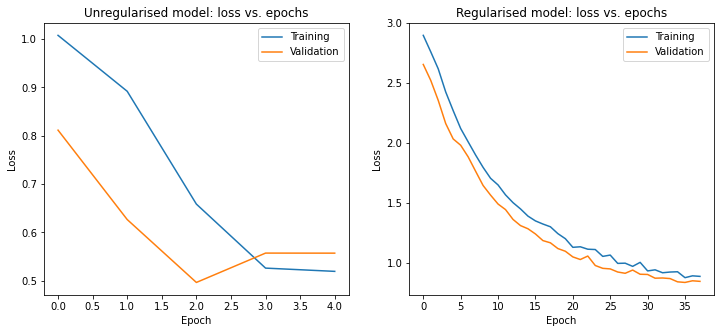

In [24]:
# Plot the training and validation loss
fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)
plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)
plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()